Setting up

In [262]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import tensorflow as tf
import os
import pandas as pd
from astropy.wcs import WCS
from shutil import copyfile

In [1]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
  # Restrict TensorFlow to only allocate 10GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


Renaming fits files

In [321]:
ls

 AdaBoost_RF_Comparison.ipynb
 arch-210828-140305/
 arch-210902-034551/
 calculate_metrics.ipynb
 CNN.ipynb
 create_PIT.ipynb
 Desktop/
 Documents/
 Downloads/
 example_notebook_producing_nans.ipynb
 filtering.ipynb
 g_part1_renamed/
 look_at_data_Yujie.ipynb
 Look_at_HSC_demp_photoz.ipynb
 magnitude_density_distribution.ipynb
 media@
 Music/
 Non-probabilistic_fully_connected_neural_network.ipynb
 nonprobablistic_neural_network_regression.ipynb
 photoz/
 photoz_demp/
'Photo-Z Estimation in XGBoost.ipynb'
 photoz_utils.py
 Pictures/
 Public/
 __pycache__/
 RF_big_data.ipynb
 Templates/
 tpot_exported_pipeline2.py
 tpot_exported_pipeline.py
 Untitled.ipynb
 Videos/
 z_image_query1.out
 z_image_query2.out
 z_part_1.tar


In [322]:
image_list = sorted(os.listdir("arch-210902-034551"))
image_list

['10-cutout-HSC-Z-9329-pdr2_wide.fits',
 '100-cutout-HSC-Z-9369-pdr2_wide.fits',
 '1000-cutout-HSC-Z-9368-pdr2_wide.fits',
 '10000-cutout-HSC-Z-9802-pdr2_wide.fits',
 '100000-cutout-HSC-Z-9612-pdr2_wide.fits',
 '100001-cutout-HSC-Z-9857-pdr2_wide.fits',
 '10001-cutout-HSC-Z-9801-pdr2_wide.fits',
 '10002-cutout-HSC-Z-9615-pdr2_wide.fits',
 '10003-cutout-HSC-Z-9810-pdr2_wide.fits',
 '10004-cutout-HSC-Z-9077-pdr2_wide.fits',
 '10005-cutout-HSC-Z-16010-pdr2_wide.fits',
 '10006-cutout-HSC-Z-9573-pdr2_wide.fits',
 '10007-cutout-HSC-Z-9462-pdr2_wide.fits',
 '10008-cutout-HSC-Z-16012-pdr2_wide.fits',
 '10009-cutout-HSC-Z-15833-pdr2_wide.fits',
 '1001-cutout-HSC-Z-9376-pdr2_wide.fits',
 '10010-cutout-HSC-Z-15832-pdr2_wide.fits',
 '10011-cutout-HSC-Z-9367-pdr2_wide.fits',
 '10012-cutout-HSC-Z-9862-pdr2_wide.fits',
 '10013-cutout-HSC-Z-9367-pdr2_wide.fits',
 '10014-cutout-HSC-Z-9461-pdr2_wide.fits',
 '10015-cutout-HSC-Z-9609-pdr2_wide.fits',
 '10016-cutout-HSC-Z-9590-pdr2_wide.fits',
 '10017-cuto

In [245]:
photozdata = pd.read_csv('/mnt/data/HSC/HSC_v6/HSC_v6.csv')

In [323]:
fail_list = []

for i in range(len(image_list)):

    
    image = fits.open("arch-210902-034551/"+image_list[i])
    wcs = WCS(image[1].header) 
    coord = wcs.pixel_to_world_values([50,70],[50,70])  
    coord_ = np.asarray(coord)
    ra2 = coord_[0][0]
    ra1 = coord_[0][1]
    dec1 = coord_[1][0]
    dec2 = coord_[1][1]
    
    filt = (photozdata["ra"] < ra2)\
    &(photozdata["ra"] > ra1)\
    &(photozdata["dec"] < dec2)\
    &(photozdata["dec"] > dec1)

    photozdata_subset = photozdata[filt]
    photozdata_subset
    
    if len(np.asarray(photozdata_subset["object_id"])) != 1:
        print ("couldn't find corresponding obejct_id for "+image_list[i])
        fail_list.append(i)
    
    else:
    
        object_id = np.asarray(photozdata_subset["object_id"])[0]
        file1 = "arch-210902-034551/" + image_list[i]
        file2 = "z_part1_renamed/" + str(object_id) + ".fits"
        
        copyfile(file1,file2)




couldn't find corresponding obejct_id for 14394-cutout-HSC-Z-9458-pdr2_wide.fits
couldn't find corresponding obejct_id for 14963-cutout-HSC-Z-9464-pdr2_wide.fits
couldn't find corresponding obejct_id for 17473-cutout-HSC-Z-15996-pdr2_wide.fits
couldn't find corresponding obejct_id for 18286-cutout-HSC-Z-15994-pdr2_wide.fits
couldn't find corresponding obejct_id for 18453-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 24071-cutout-HSC-Z-9246-pdr2_wide.fits
couldn't find corresponding obejct_id for 24856-cutout-HSC-Z-9480-pdr2_wide.fits
couldn't find corresponding obejct_id for 29073-cutout-HSC-Z-9695-pdr2_wide.fits
couldn't find corresponding obejct_id for 29144-cutout-HSC-Z-8766-pdr2_wide.fits
couldn't find corresponding obejct_id for 39122-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 39123-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 39389-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find correspo

In [324]:
len(fail_list)

99

In [327]:
fail_list2 = []

for i in fail_list:

    
    image = fits.open("arch-210902-034551/"+image_list[i])
    wcs = WCS(image[1].header) 
    coord = wcs.pixel_to_world_values([59,61],[59,61])  
    coord_ = np.asarray(coord)
    ra2 = coord_[0][0]
    ra1 = coord_[0][1]
    dec1 = coord_[1][0]
    dec2 = coord_[1][1]
    
    filt = (photozdata["ra"] < ra2)\
    &(photozdata["ra"] > ra1)\
    &(photozdata["dec"] < dec2)\
    &(photozdata["dec"] > dec1)

    photozdata_subset = photozdata[filt]
    photozdata_subset
    
    if len(np.asarray(photozdata_subset["object_id"])) != 1:
        print ("couldn't find corresponding obejct_id for "+image_list[i])
        fail_list2.append(i)
    
    else:
    
        object_id = np.asarray(photozdata_subset["object_id"])[0]
        file1 = "arch-210902-034551/" + image_list[i]
        file2 = "z_part1_renamed/" + str(object_id) + ".fits"
        
        copyfile(file1,file2)

couldn't find corresponding obejct_id for 18453-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 39122-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 39123-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 39389-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 39566-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 39670-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 45957-cutout-HSC-Z-8520-pdr2_wide.fits
couldn't find corresponding obejct_id for 69243-cutout-HSC-Z-9105-pdr2_wide.fits
couldn't find corresponding obejct_id for 72127-cutout-HSC-Z-16973-pdr2_wide.fits
couldn't find corresponding obejct_id for 74707-cutout-HSC-Z-9619-pdr2_wide.fits
couldn't find corresponding obejct_id for 76195-cutout-HSC-Z-9859-pdr2_wide.fits
couldn't find corresponding obejct_id for 76516-cutout-HSC-Z-9373-pdr2_wide.fits
couldn't find corresp

In [328]:
len(fail_list2)

28

In [330]:
image = fits.open("arch-210902-034551/76826-cutout-HSC-Z-9347-pdr2_wide.fits")
wcs = WCS(image[1].header) 
coord = wcs.pixel_to_world_values([58,62],[58,62])  
coord_ = np.asarray(coord)
ra2 = coord_[0][0]
ra1 = coord_[0][1]
dec1 = coord_[1][0]
dec2 = coord_[1][1]
    
filt = (photozdata["ra"] < ra2)\
&(photozdata["ra"] > ra1)\
&(photozdata["dec"] < dec2)\
&(photozdata["dec"] > dec1)

photozdata_subset = photozdata[filt]
photozdata_subset

,object_id,specz_redshift_err,specz_redshift,specz_mag_i,specz_name,specz_ra,specz_dec,specz_flag_homogeneous,ra,dec,...,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,y_cmodel_mag,g_cmodel_magsigma,r_cmodel_magsigma,i_cmodel_magsigma,z_cmodel_magsigma,y_cmodel_magsigma
76824,41108837092035108,0.00003,0.17862,16.764999,SDSS-DR12-1237648720693690699,179.67948,-0.611448,True,179.679537,-0.611453,...,18.511921,17.185848,16.434933,15.935467,15.676268,0.000801,0.000412,0.000239,0.000310,0.000528
248687,41108837092061909,0.00059,0.17877,16.885000,GAMA-DR2-560209,179.67962,-0.611600,True,179.679536,-0.611452,...,18.502052,17.190716,16.459824,15.952831,15.681671,0.000804,0.000413,0.000241,0.000311,0.000528


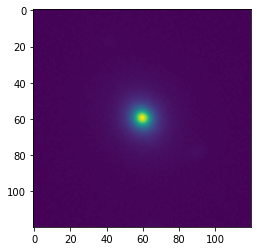

In [320]:
image1_ = image1[1].data
plt.imshow(image1_)

In [52]:
data = np.asarray(image1_)
data_new = np.reshape(data,[1,120,120,1])

-0.03016504

In [2]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [75]:
from sklearn.model_selection import train_test_split



model = Sequential()
model.add(Conv2D(1, kernel_size=(3, 3),activation='tanh',input_shape=(120,120,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(1, kernel_size=(2,2),activation='tanh'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(1, kernel_size=(3,3),activation='relu'))
model.add(Conv2D(1, kernel_size=(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(500, activation="tanh"))
model.add(Dense(100, activation="tanh"))
model.add(Dense(1))



#model.compile(optimizer='Adam', loss="mse",metrics=[tf.keras.metrics.MeanAbsoluteError()])

a = model.predict(data_new)

model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 118, 118, 1)       10        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 59, 59, 1)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 58, 58, 1)         5         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 29, 29, 1)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 27, 27, 1)         10        
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 26, 26, 1)         5         
_________________________________________________________________
flatten (Flatten)            (None, 676)             

array([[-0.00315684]], dtype=float32)